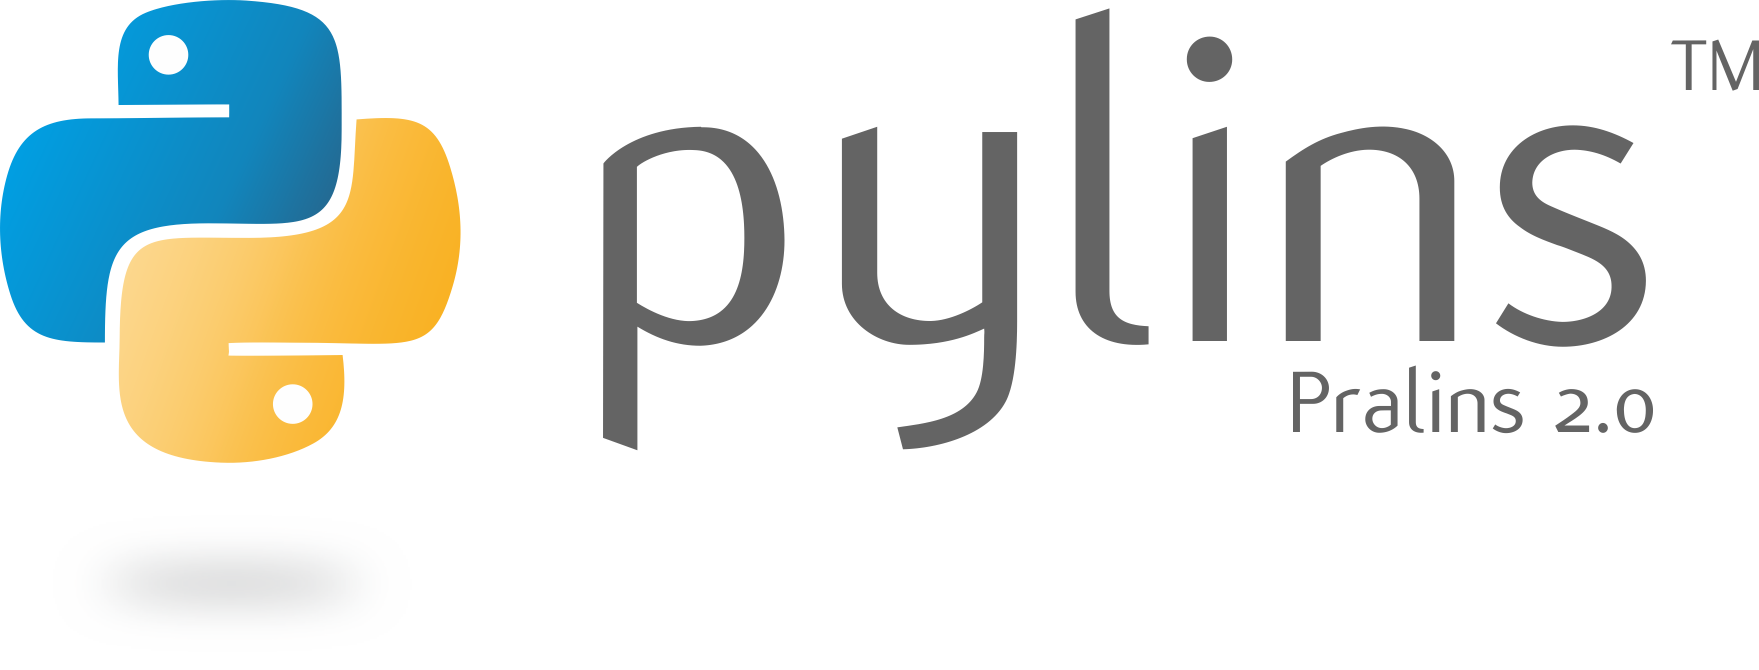

In [1]:
from PyLINS import pca, Cluster, PopDistribution_Boxplots, Cluster3d_distribution, Clusters_3dplot, PubChemBibliographicDataSearcher, Selection, ReagentSearcher, SpaceCoverage, PopCoverage, coverage_heatmap, tsne_pylins, Clusters_2dtsneplot

#Additional commands that may be needed#
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plt
import os
import numpy as np
from time import sleep
import random

from rdkit import Chem
from rdkit.Chem import Recap
from rdkit.Chem import rdDepictor,Recap
from rdkit.Chem.Draw import rdMolDraw2D, MolsToGridImage

from sklearn.manifold import TSNE


# PyLINS modules

### 1. PCA REDUCTION

In [2]:
# Import Data:
'''REQUEST: Database of molecules with calculated descriptors in txt. Requirements: First column should be 'mol' with SMILES, and subsequents should consist in different molecular descriptors of interest '''
df = pd.read_csv("example_database.txt").iloc[:100,:] #the database has been shortened for a simplified example
 
# Reduce to PCA ()
'''REQUEST components_var: number of PCAs desired to be calculated (n>1) or explained variance to be calculated (0<n<1)'''
components_var=0.95 # Input: value asked to user "Stablish number of PCA or explained variance desired"
X=pca(df,components_var, plot=False)

The number of PCs needed is 9 (with 0.9530233785529478 variance)


C:\Users\leti_\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\Users\leti_\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:550: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


C:\Users\leti_\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:578: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis




In [3]:
pca(df,components_var, plot=True) # Output: Plot of explained variance should be saved if desired.


C:\Users\leti_\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\Users\leti_\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:550: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


C:\Users\leti_\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:578: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis




The number of PCs needed is 9 (with 0.9530233785529478 variance)


In [4]:
pca(df,components_var, variance=True)

The number of PCs needed is 9 (with 0.9530233785529478 variance)


C:\Users\leti_\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\Users\leti_\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:550: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


C:\Users\leti_\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:578: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis




array([0.41478151, 0.23236436, 0.13228434, 0.0836326 , 0.03157037,
       0.02194093, 0.01591992, 0.01263044, 0.00789892])

### 2. CLUSTERING & PARTITIONING

In [5]:
#Clustering & partitioning methodologies:
'''REQUEST NCLUST: Number of clusters desired to be calculated'''

NCLUST= 10 # Input: value asked to user

'''REQUEST: Enter list of clustering and partitioning methodologies or 'All' if possible'''
#Clustering & partitioning algorithms available: lustering_names: 
#'HRC_single', 'HRC_complete', 'HRC_median', 'HRC_average', 'HRC_centroid', 'HRC_ward', 'KMN', 'KMED', 'spectral_clust', 'BINNING', 'OV_BIN' 

Cluster(df, X, NCLUST, clustering_names=['HRC_average', 'KMN', 'OV_BIN'])     

Processing HRC average clustering

Clustering calculation done!

Processing KMN clustering

Clustering calculation done!

Processing Optimum Variance Binning clustering



C:\Users\leti_\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\Users\leti_\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:550: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


C:\Users\leti_\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:578: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


C:\Users\leti_\Desktop\PhD\Python - Jupyter\ANNEX\PyLINS.py:193: SettingWithCopyWarning:

The number of PCs needed is 9 (with 0.9530233785529478 variance)
PCA variances: [0.41478151 0.23236436 0.13228434 0.0836326  0.03157037 0.02194093
 0.01591992 0.01263044 0.00789892] 

Stablishing PCA priority to be binned depending on its variance:

0 ROUND 

1 partitions: [0] 
[0.20739075 0.23236436 0.13228434 0.0836326  0.03157037 0.02194093
 0.01591992 0.01263044 0.00789892]
1 ROUND 

2 partitions: [0, 1] 
[0.20739075 0.11618218 0.13228434 0.0836326  0.03157037 0.02194093
 0.01591992 0.01263044 0.00789892]
2 ROUND 

3 partitions: [0, 1, 0] 
[0.10369538 0.11618218 0.13228434 0.0836326  0.03157037 0.02194093
 0.01591992 0.01263044 0.00789892]
3 ROUND 

4 partitions: [0, 1, 0, 2] 
[0.10369538 0.11618218 0.06614217 0.0836326  0.03157037 0.02194093
 0.01591992 0.01263044 0.00789892]
4 ROUND 

5 partitions: [0, 1, 0, 2, 1] 
[0.10369538 0.05809109 0.06614217 0.0836326  0.03157037 0.02194093
 0.01591992 0.01263044 0.00789892]
5 ROUND 

6 partitions: [0, 1, 0, 2, 1, 0] 
[0.05184769 0.0580910

,0,1,2,3,4,5,6,7,8,HRC_average,KMN,OV_BIN
0,1.576889,1.041875,-0.677764,0.331728,4.393581,-2.821890,1.051572,0.456107,0.121127,1,3,3
1,1.194957,0.611419,0.040623,0.431032,3.694188,-1.277496,0.034844,0.412468,-1.038397,1,9,3
2,1.042582,0.452275,0.458120,0.230758,2.574418,-2.596808,0.181467,0.250702,1.936280,0,3,3
3,1.345748,0.861377,-0.901757,1.394264,2.550208,-2.192476,-0.013392,0.429461,-0.868590,1,9,3
4,0.312610,-0.094422,-0.863289,0.252560,3.019826,-1.848938,0.123484,0.305853,2.288004,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.311672,0.583487,-0.930098,-0.870658,-0.944262,1.108936,-1.196332,-1.176461,-3.133209,2,9,3
996,1.158787,0.426930,-0.504874,-1.056989,-2.081467,-0.166683,-1.137287,-1.263933,-0.182251,4,5,3
997,1.436681,0.768206,-1.363225,-0.941756,-0.622783,-0.041187,-0.516803,-1.408246,-2.895491,2,9,3
998,0.412278,-0.166776,-1.837784,-1.048653,-1.343524,0.345278,-1.220808,-0.747007,0.165383,4,5,1


In [6]:
X_cluster=Cluster(df, X, NCLUST, clustering_names='All')        

Processing HRC single clustering 

Processing HRC complete clustering

Processing HRC median clustering

Processing HRC average clustering

Processing HRC centroid clustering

Processing HRC ward clustering

Processing KMN clustering

Processing KMED clustering

Processing Spectral clustering

Processing  Binning clustering

dividing 1 column
4 Bins have been created, 4 are occupied
dividing 2 column
8 Bins have been created, 8 are occupied
dividing 3 column
8 Bins have been created, 8 are occupied
Processing Optimum Variance Binning clustering

The number of PCs needed is 9 (with 0.9530233785529478 variance)
PCA variances: [0.41478151 0.23236436 0.13228434 0.0836326  0.03157037 0.02194093
 0.01591992 0.01263044 0.00789892] 

Stablishing PCA priority to be binned depending on its variance:

0 ROUND 

1 partitions: [0] 
[0.20739075 0.23236436 0.13228434 0.0836326  0.03157037 0.02194093
 0.01591992 0.01263044 0.00789892]
1 ROUND 

2 partitions: [0, 1] 
[0.20739075 0.11618218 0.13228434 0

C:\Users\leti_\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\Users\leti_\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:550: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


C:\Users\leti_\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:578: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


C:\Users\leti_\Desktop\PhD\Python - Jupyter\ANNEX\PyLINS.py:193: SettingWithCopyWarning:

2 Bins have been created, 2 are occupied

2 cuts are made in 1 PCA

[0.1425602983926635, 3.016124154342677]
4 Bins have been created, 4 are occupied

4 cuts are made in 0 PCA

[-0.9705257804973817, 0.34149492022390815]
[1.653515620945198, 2.965536321666488]
8 Bins have been created, 8 are occupied

2 cuts are made in 2 PCA

[0.3858417630738513, 2.915895890493501]
8 Bins have been created, 8 are occupied

Clustering calculation done!



In [7]:
# '''REQUEST CSVname: directory and name to save the outpùt clustering data as csv'''
# CSVname='../Annex8_ClusteredDatabases/INPUTNAME'
# X_cluster.to_csv('{}.csv'.format(CSVname))

#### 2.1. CLUSTERING ANALYSIS

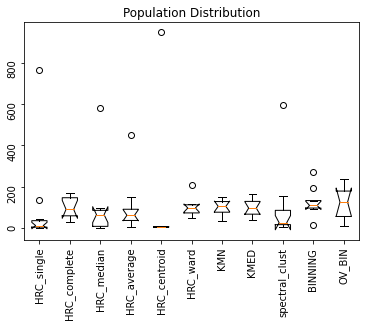

In [8]:
#Population Distribution analysis Boxplots

clustering_names=X_cluster.columns[len(X.columns):]
PNGname='test'

PopDistribution_Boxplots(X_cluster, clustering_names, PNGname, fliers=True)
#The boxplot will be saved as PNGname_popdistboxplot.png

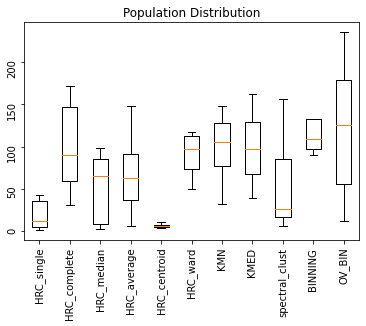

In [9]:
PopDistribution_Boxplots(X_cluster,clustering_names, PNGname, fliers=False)
#The boxplot will be saved as PNGname_popdistboxplot_nofliers.png

Cluster distribution: 


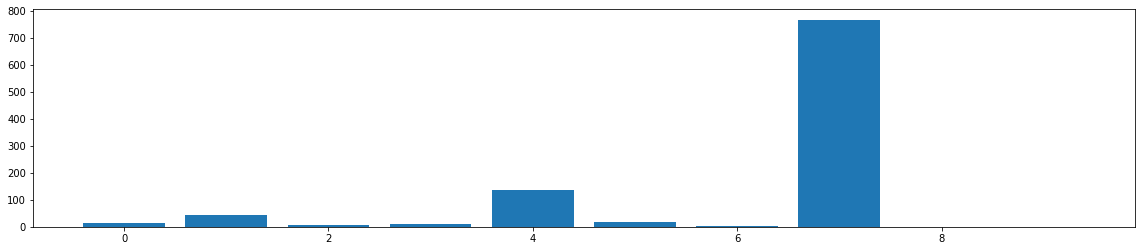

Most populated cluster: 7
Less populated cluster: 8
Which cluster would you like to visualize? 7


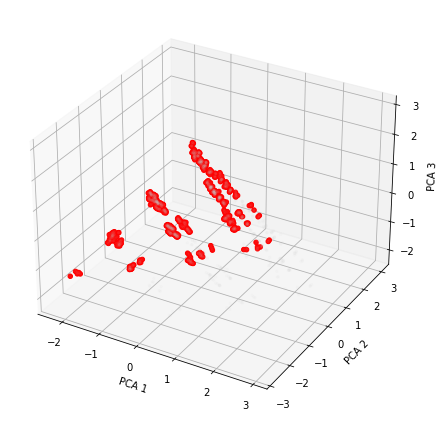

In [10]:
#3D Cluster analysis
'''
If a clustering method appears to have an unbalanced distribution, an analysis can be made with this function
to deeper study the number of analogs of the specified cluster. 
'''
Cluster3d_distribution(X_cluster, 'HRC_single')


#### 2.2. CLUSTERING 3D PLOTS

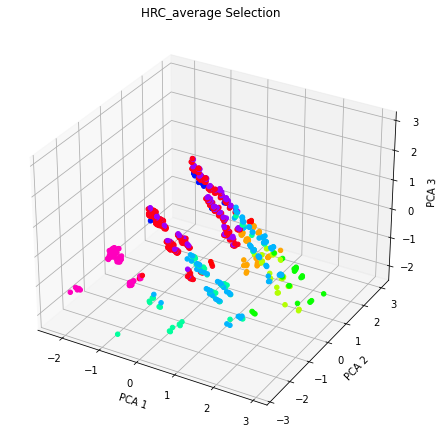

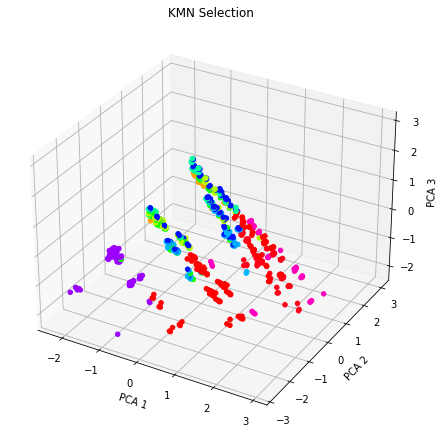

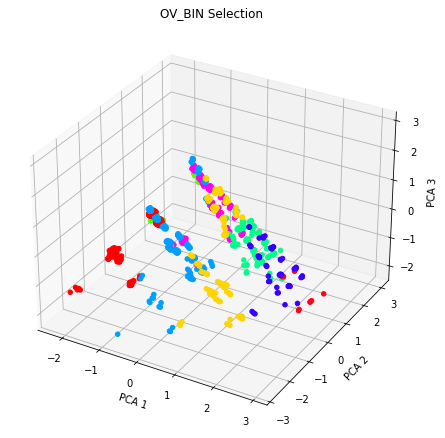

In [11]:
# Clustering 3D Plots
Clusters_3dplot(X, X_cluster, clustering_names=['HRC_average', 'KMN', 'OV_BIN'])

### 3. LIBRARY SIZES AND SELECTIONS

#### 3.1. BIBLIOGRAPHIC DATA SEARCHER

In [12]:
#ATTENTION: The performance of this function may take a large time depending on the size of the database
# '''This function will return an array of the library index of coincident reported molecules and their corresponding PubChem CIDs'''
bibliographic_df= PubChemBibliographicDataSearcher(df['mol']) #this function will take some time, it is recommended to save the results for further studies
bibliographic_df

Time of execution [min]:20.102889100710552


,index,CID
0,4,68485773
1,24,115358
2,796,12827752
3,797,57401261
4,798,57392561
5,799,57335751
6,802,57396037
7,803,68824793
8,808,57392562
9,814,57401260


#### 3.2. SELECTIONS

In [13]:
#The class Selection contains all the selection modes
A=Selection(X, X_cluster)

##### 3.2.1. Centroid Selection

In [14]:
A.centroid_selection('HRC_single')

[797, 934, 215, 816, 858, 129, 30, 757, 470, 0]

##### 3.2.2. Cherry-picking Selection

In [15]:
A.cherrypicking_selection('HRC_single')

[819, 994, 545, 810, 974, 377, 108, 490, 470, 0]

##### 3.2.3. Directed Selection

In [16]:
'''
Given an array of the accesible molecules (in the example, 10 randomly picked molecules will be considered), 
this function will return a dataatrix with the sorted the molecules within their corresponding clusters 
from ascendending distance to cluster centroid 
'''
accessible_molecules= random.choices(df.index.values, k=10) 
A.directed_selection_results('HRC_single', accessible_molecules)

,0,1,2,3,4,5,6,7,8,distance,HRC_single
982,1.519738,0.768753,-0.688014,-1.928664,0.707176,0.068594,0.368299,-1.814300,-2.682198,2.537056,1.0
917,1.875299,-0.656407,0.221353,-0.445663,-1.449708,1.162566,-0.334416,0.513730,0.954515,1.797733,4.0
296,0.438522,-0.190085,1.060647,1.030235,-0.624327,0.514979,0.572300,0.227104,0.144978,1.788871,7.0
407,-0.235935,1.037865,0.302015,0.351595,-1.387489,-0.353467,0.801464,-0.027337,-0.563331,2.065456,7.0
175,-1.062426,-0.114333,-0.123865,-0.240856,0.605682,0.659604,-0.284230,-1.739929,0.184517,2.165136,7.0
581,0.461604,-0.198250,1.131645,1.281203,0.026536,-0.305148,-1.664897,-0.138397,-0.005815,2.353860,7.0
85,0.232039,-0.518364,2.361446,0.028179,-0.400895,-0.245622,0.835114,0.133881,0.087663,2.535893,7.0
89,-0.445370,0.587902,1.658596,-0.616832,-1.167389,-1.157272,0.480969,0.954496,-0.605105,2.772947,7.0
536,-0.492133,0.543586,1.618836,-0.768596,-1.000265,-1.452380,-0.189131,-1.218138,-1.153149,3.078784,7.0
450,0.043452,1.466677,-1.084431,1.395151,-1.228163,0.146382,-0.431153,-1.872540,-0.121391,3.233851,7.0


### 4. DATA FILTERING

#### 4.1 Lipinski violation

In [17]:
'''
The lipinski violation filter can be applied directly through data mining of the molecular descriptior ['lip_violation']. 
As ['lip_violation']<1 is too restrictive, it is recommended to consider the violation of None or one Lipinski rule (['lip_violation']<2)
'''
df[df['lip_violation']<2]

,mol,apol,ast_fraglike,ast_fraglike_ext,ast_violation,ast_violation_ext,a_acc,a_acid,a_aro,a_base,...,vsa_acid,vsa_base,vsa_don,vsa_hyd,vsa_other,vsa_pol,Weight,weinerPath,weinerPol,zagreb
0,O(C)c1c(Oc2ccccc2)c2c(C)cc(OC)nc2c(NC(CCCN)C)c1,65.522995,0,0,2,3,3,0,16,0,...,0,0,5.682576,342.60101,17.957043,31.611399,395.50299,2174,47,146
1,Clc1c(Oc2c(OC)cc(NC(CCCN)C)c3nc(OC)cc(C)c23)cccc1,67.036201,0,0,2,3,3,0,16,0,...,0,0,5.682576,360.89420,17.957043,31.611399,429.94800,2365,50,152
2,Brc1c(Oc2c(OC)cc(NC(CCCN)C)c3nc(OC)cc(C)c23)cccc1,67.906204,0,0,2,3,3,0,16,0,...,0,0,5.682576,372.66956,17.957043,31.611399,474.39899,2365,50,152
3,Fc1c(Oc2c(OC)cc(NC(CCCN)C)c3nc(OC)cc(C)c23)cccc1,65.413200,0,0,2,3,3,0,16,0,...,0,0,5.682576,347.72198,17.957043,31.611399,413.49298,2365,50,152
4,FC(F)(F)c1c(Oc2c(OC)cc(NC(CCCN)C)c3nc(OC)cc(C)...,68.287201,0,0,2,3,3,0,16,0,...,0,0,5.682576,373.77246,17.957043,31.611399,463.50000,3034,56,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Clc1c(F)c(OC)ccc1Oc1c(OC)cc(NC(CCCN)C)c2nccc(C...,66.926414,0,0,3,4,4,0,16,0,...,0,0,5.682576,378.96472,2.503756,34.115154,447.93799,2660,54,158
996,Brc1c(F)c(OC)ccc1Oc1c(OC)cc(NC(CCCN)C)c2nccc(C...,67.796410,0,0,3,4,4,0,16,0,...,0,0,5.682576,390.74008,2.503756,34.115154,492.38898,2660,54,158
997,Fc1c(F)c(Oc2c(OC)cc(NC(CCCN)C)c3nccc(C)c23)ccc1OC,65.303413,0,0,3,4,4,0,16,0,...,0,0,5.682576,365.79251,2.503756,34.115154,431.48300,2660,54,158
998,FC(F)(F)c1c(F)c(OC)ccc1Oc1c(OC)cc(NC(CCCN)C)c2...,68.177414,0,0,3,4,4,0,16,0,...,0,0,5.682576,391.84299,2.503756,34.115154,481.48999,3311,60,176


#### 4.2 Commercial avilability

1. Fragment decomposition of the molecules

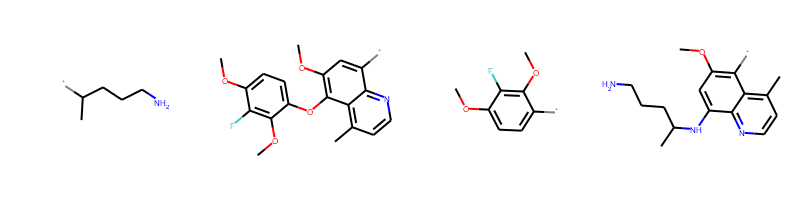

In [18]:
'''
A manual inspection of the desired derivatization point is needed to further check which reagents are desired to be searched
'''
#1st Fragment decomposition of the molecules
key_dict={}
for i,j in zip(df['mol'],df.index.values): #Here, it can also be considered the previous filter, instead of df, df[df['lip_violation']<2] would apply
    m = Chem.MolFromSmiles(i)
    hierarch = Recap.RecapDecompose(m)
    ks=hierarch.children.keys()
    key_dict[j]= ks
mols=[Chem.MolFromSmiles(i) for i in key_dict[j]]
MolsToGridImage(mols[:100], molsPerRow=4,subImgSize=(200,200))

2. Create the array of desired fragments to be checked and generate its reagent by text mining changing * value for the needed chemical group


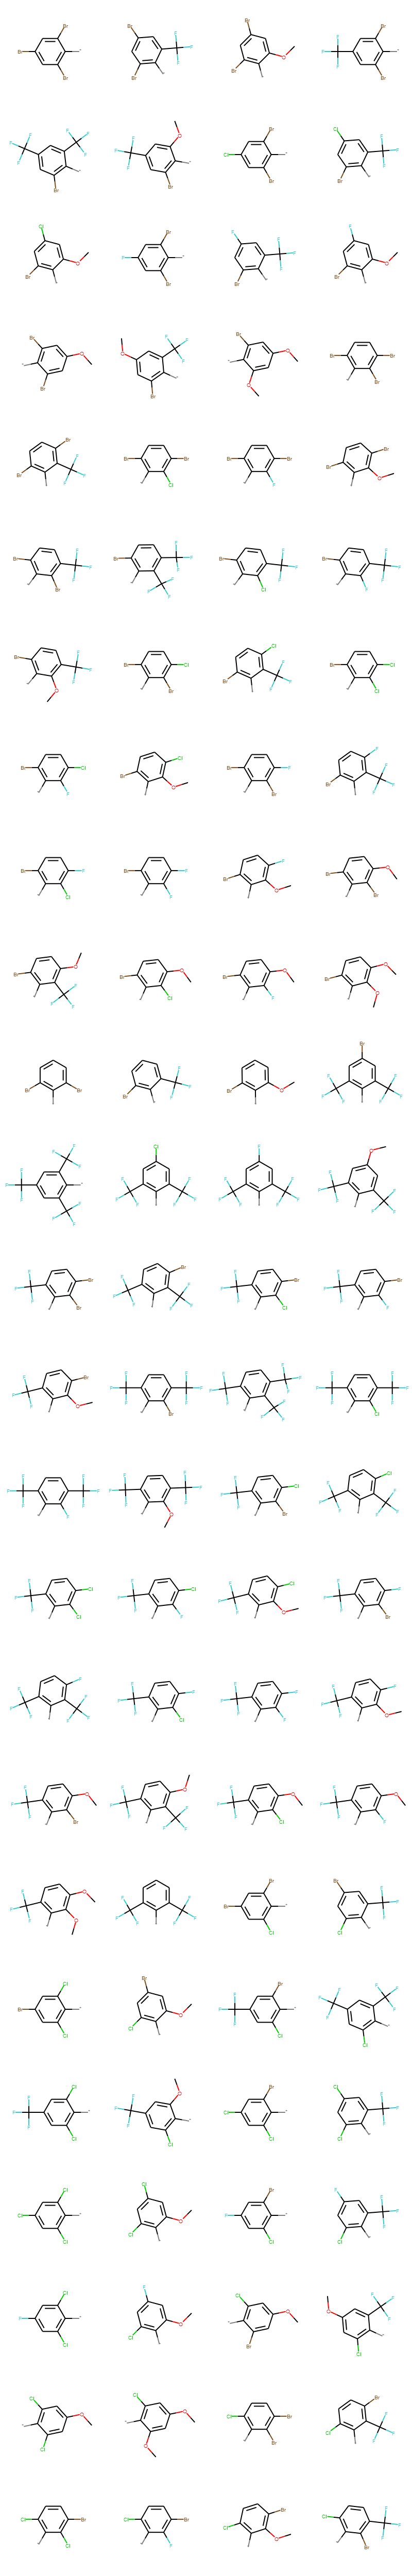

In [19]:
radikal=[]
reagent=[]
for i in key_dict:
    for j in key_dict[i]:
        radikal.append(j)
for i in range(2,len(radikal),4): # it has been seen that the aryl substituent of interest can be found in the 2 radikal of each molecule (having 4 possible fragments)
    reagent.append(radikal[i])
reagent2=np.unique(reagent)   

mols2=[Chem.MolFromSmiles(i) for i in reagent2]
MolsToGridImage(mols2[:100], molsPerRow=4,subImgSize=(200,200)) 

In [20]:
smiles=[reagent2[i].replace('*', 'O') for i in range(len(reagent2))]
smiles

['Oc1c(Br)cc(Br)cc1Br',
 'Oc1c(Br)cc(Br)cc1C(F)(F)F',
 'Oc1c(Br)cc(Br)cc1OC',
 'Oc1c(Br)cc(C(F)(F)F)cc1Br',
 'Oc1c(Br)cc(C(F)(F)F)cc1C(F)(F)F',
 'Oc1c(Br)cc(C(F)(F)F)cc1OC',
 'Oc1c(Br)cc(Cl)cc1Br',
 'Oc1c(Br)cc(Cl)cc1C(F)(F)F',
 'Oc1c(Br)cc(Cl)cc1OC',
 'Oc1c(Br)cc(F)cc1Br',
 'Oc1c(Br)cc(F)cc1C(F)(F)F',
 'Oc1c(Br)cc(F)cc1OC',
 'Oc1c(Br)cc(OC)cc1Br',
 'Oc1c(Br)cc(OC)cc1C(F)(F)F',
 'Oc1c(Br)cc(OC)cc1OC',
 'Oc1c(Br)ccc(Br)c1Br',
 'Oc1c(Br)ccc(Br)c1C(F)(F)F',
 'Oc1c(Br)ccc(Br)c1Cl',
 'Oc1c(Br)ccc(Br)c1F',
 'Oc1c(Br)ccc(Br)c1OC',
 'Oc1c(Br)ccc(C(F)(F)F)c1Br',
 'Oc1c(Br)ccc(C(F)(F)F)c1C(F)(F)F',
 'Oc1c(Br)ccc(C(F)(F)F)c1Cl',
 'Oc1c(Br)ccc(C(F)(F)F)c1F',
 'Oc1c(Br)ccc(C(F)(F)F)c1OC',
 'Oc1c(Br)ccc(Cl)c1Br',
 'Oc1c(Br)ccc(Cl)c1C(F)(F)F',
 'Oc1c(Br)ccc(Cl)c1Cl',
 'Oc1c(Br)ccc(Cl)c1F',
 'Oc1c(Br)ccc(Cl)c1OC',
 'Oc1c(Br)ccc(F)c1Br',
 'Oc1c(Br)ccc(F)c1C(F)(F)F',
 'Oc1c(Br)ccc(F)c1Cl',
 'Oc1c(Br)ccc(F)c1F',
 'Oc1c(Br)ccc(F)c1OC',
 'Oc1c(Br)ccc(OC)c1Br',
 'Oc1c(Br)ccc(OC)c1C(F)(F)F',
 'Oc1c(Br)ccc(OC

3. ReagentSearcher application 

In [21]:
#Specifiy the trusted vendors by the group in an array
vendors=['Sigma-Aldrich', 'Fluorochem', 'abcr', 'Alfa Aesar','TCI']

#An Api_key must be defined previously via https://developer.rsc.org/
RS=ReagentSearcher(vendors, api_key='WsDKk1rJAkDmAFWfYp1jBZRMc35zHo0E')

#ATTENTION: The performance of this function may take a large time depending on the size of the database
#Only 400 requests are permitted per api_key (a simplified example is given with only 50 molecules). 
reagents_index=RS.suppliers(smiles[-50:], method='boolean')
reagents_index

[0,
 2,
 7,
 8,
 9,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 23,
 24,
 26,
 28,
 29,
 30,
 31,
 32,
 35,
 36,
 37,
 38,
 39,
 41,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [22]:
#Vendors where each reagent can be purchased
#ATTENTION: The performance of this function may take a large time depending on the size of the database
reagents_suppliers=RS.suppliers(np.array(smiles[-50:])[reagents_index], method='vendors')
reagents_suppliers

C:\Users\leti_\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:270: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



[array(['Alfa Aesar', 'Sigma-Aldrich', 'abcr'], dtype='<U13'),
 array(['Alfa Aesar', 'Sigma-Aldrich', 'TCI', 'abcr'], dtype='<U13'),
 array(['abcr'], dtype='<U4'),
 array(['Alfa Aesar', 'Sigma-Aldrich', 'TCI', 'abcr'], dtype='<U13'),
 array([list(['abcr']), list(['abcr', 'TCI'])], dtype=object),
 array(['Alfa Aesar', 'Sigma-Aldrich', 'TCI', 'abcr'], dtype='<U13'),
 array(['TCI', 'abcr'], dtype='<U4'),
 array(['abcr'], dtype='<U4'),
 array(['Alfa Aesar', 'Sigma-Aldrich', 'TCI', 'abcr'], dtype='<U13'),
 array(['abcr'], dtype='<U4'),
 array(['abcr'], dtype='<U4'),
 array(['abcr'], dtype='<U4'),
 array(['abcr'], dtype='<U4'),
 array(['Alfa Aesar', 'Sigma-Aldrich', 'TCI', 'abcr'], dtype='<U13'),
 array(['abcr'], dtype='<U4'),
 array(['Alfa Aesar', 'Sigma-Aldrich', 'abcr'], dtype='<U13'),
 array(['Sigma-Aldrich', 'abcr'], dtype='<U13'),
 array(['Alfa Aesar', 'Sigma-Aldrich', 'TCI', 'abcr'], dtype='<U13'),
 array(['abcr'], dtype='<U4'),
 array(['Alfa Aesar', 'Sigma-Aldrich', 'TCI', 'abcr'], d

### 5. Coverage assessment

#### 5.1 Space and Population Coverage

In [23]:
#Space and Population Coverages
#The showed example shows the two coverages of the centroid selection for the 10 HRC_single clusters in the clustered space by KMN algorithm
[SpaceCoverage(A.centroid_selection('HRC_single'),X_cluster,'KMN'), PopCoverage(A.centroid_selection('HRC_single'),X_cluster,'KMN')]

[50.0, 45.5]

#### 5.2 Coverage Heatmap

In [24]:
'''
Stablish the clustering performances to be compared (clustering_names)
If random_control = True, a random study of NCLUST randomly selected molecues will be showed as the mean value of 5,000 repetitions
'''
B=coverage_heatmap(X, X_cluster, clustering_names=['HRC_average', 'KMN', 'OV_BIN'], random_control=True)

Enter name of the CSV file to save dataframe of selected compounds: test


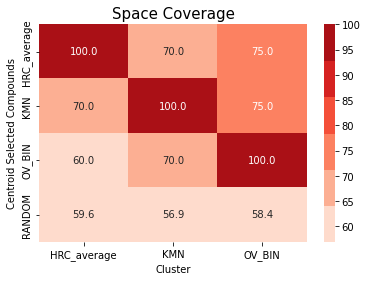

In [25]:
#Space Coverage Heatmap
'''
Two methods for cluster selection: Centroid/Cherry Picking
SpaceCov Heatmaps will be shown in red
The heatmap can be saved as *.csv file if specifying CSVname=True and as *.png file if savePNG=True
'''
B.spacecov(selection_method='Centroid', CSVname=True, savePNG=False)

Enter name of the CSV file to save dataframe of selected compounds: test


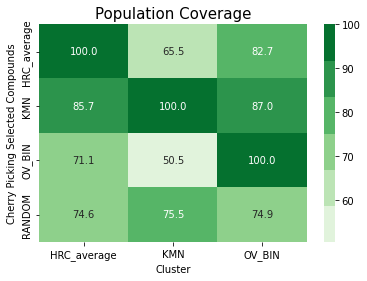

In [26]:
#Population Coverage Heatmap
'''
Two methods for cluster selection: Centroid/Cherry Picking
PopCov Heatmaps will be shown in green
The heatmap can be saved as *.csv file if specifying CSVname=True and as *.png file if savePNG=True
'''
B.popcov(selection_method='Cherry Picking', CSVname=False, savePNG=False)

### 6. t-SNE visualization

1. A visual inspection of data grouping has to be previously performed to choose the addient perplexity and iterations for the database distribution. This can be performed through a looped process and visual inspection of the tsne_pylins function.

C:\Users\leti_\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

C:\Users\leti_\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.011s...
[t-SNE] Computed neighbors for 1000 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.150464
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.939827
[t-SNE] KL divergence after 5000 iterations: 0.213911
t-SNE done! Time elapsed: 34.08983492851257 seconds
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 5.343137


C:\Users\leti_\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

C:\Users\leti_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

C:\Users\leti_\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



[t-SNE] KL divergence after 250 iterations with early exaggeration: 35.025566
[t-SNE] KL divergence after 5000 iterations: 0.064251
t-SNE done! Time elapsed: 33.499879598617554 seconds
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.004s...
[t-SNE] Computed neighbors for 1000 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 22.611002


C:\Users\leti_\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

C:\Users\leti_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

C:\Users\leti_\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.943016
[t-SNE] KL divergence after 5000 iterations: 0.291340
t-SNE done! Time elapsed: 38.528992652893066 seconds
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 6.569808


C:\Users\leti_\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

C:\Users\leti_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

C:\Users\leti_\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



[t-SNE] KL divergence after 250 iterations with early exaggeration: 36.627991
[t-SNE] KL divergence after 1050 iterations: 0.037399
t-SNE done! Time elapsed: 9.07262134552002 seconds
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.081s...


C:\Users\leti_\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

C:\Users\leti_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 9.680425


C:\Users\leti_\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



[t-SNE] KL divergence after 250 iterations with early exaggeration: 33.072483
[t-SNE] KL divergence after 5000 iterations: 0.034595
t-SNE done! Time elapsed: 59.912837982177734 seconds


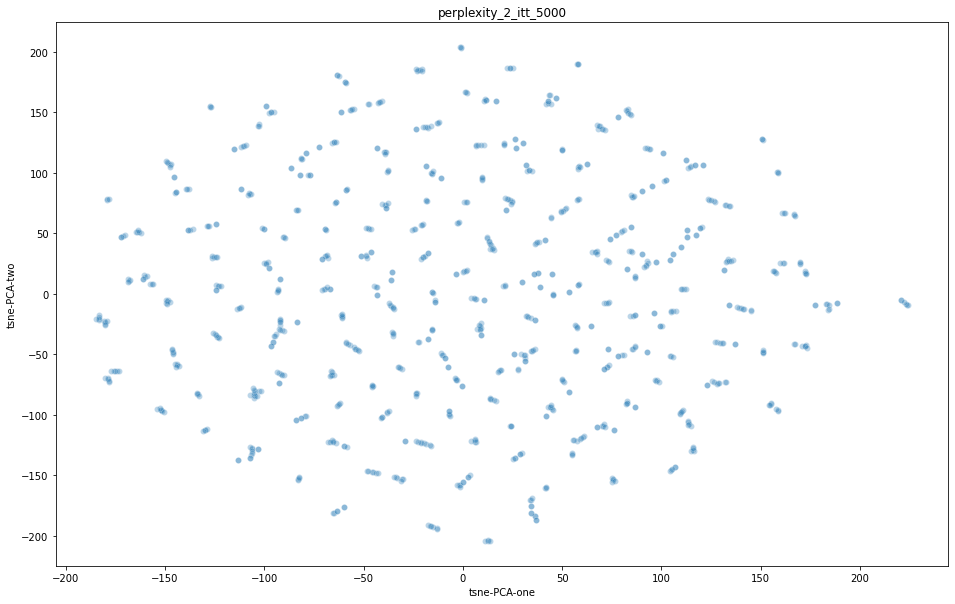

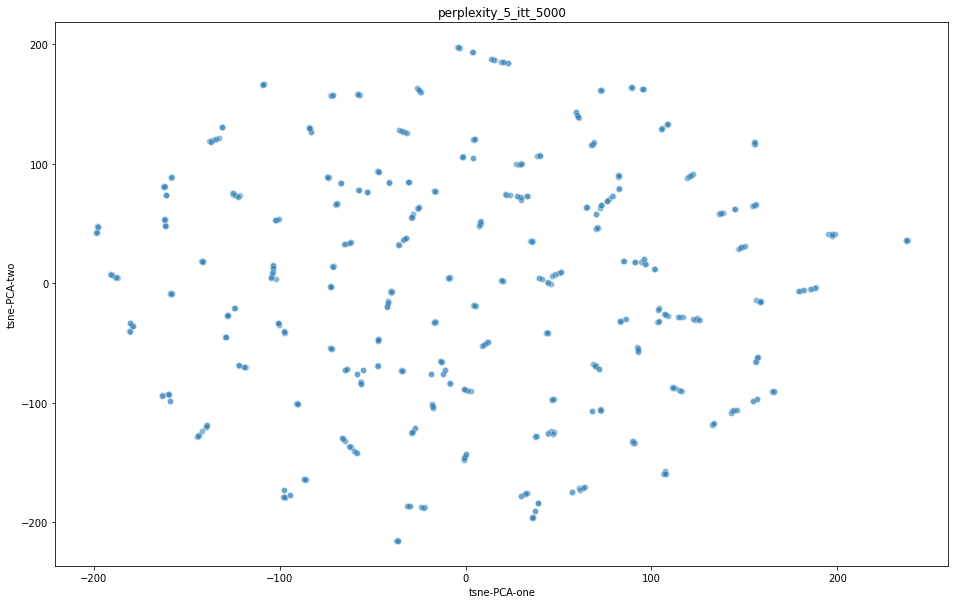

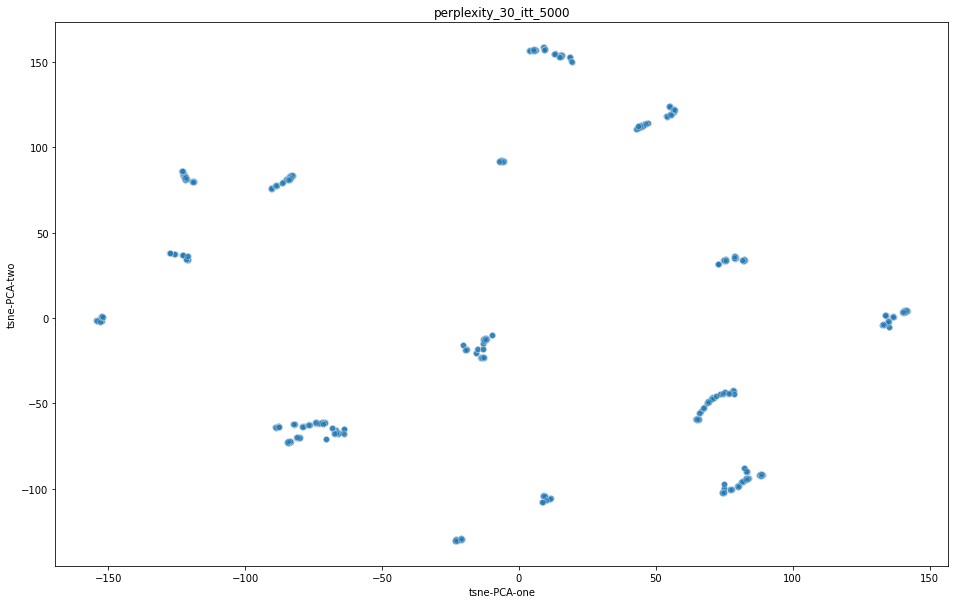

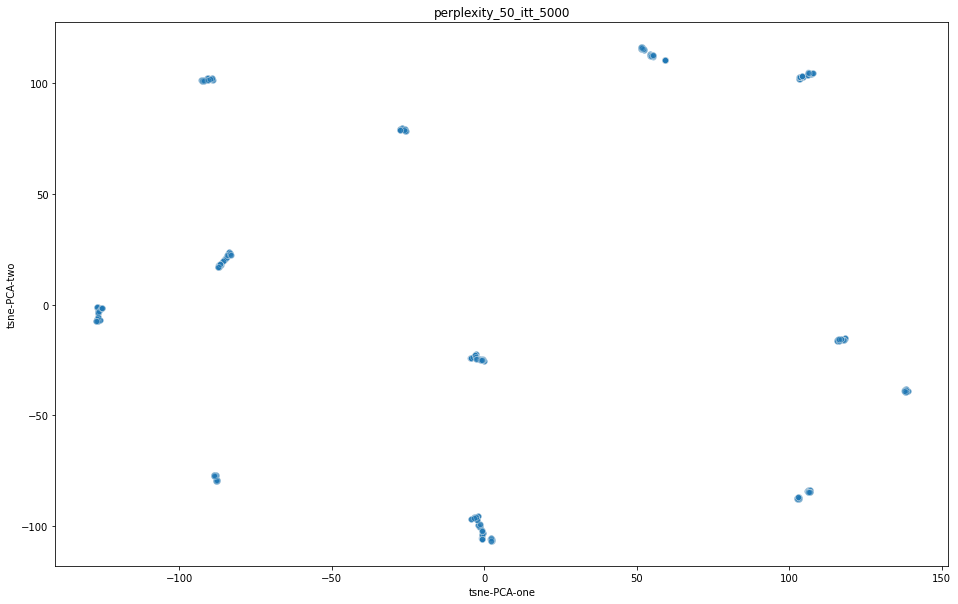

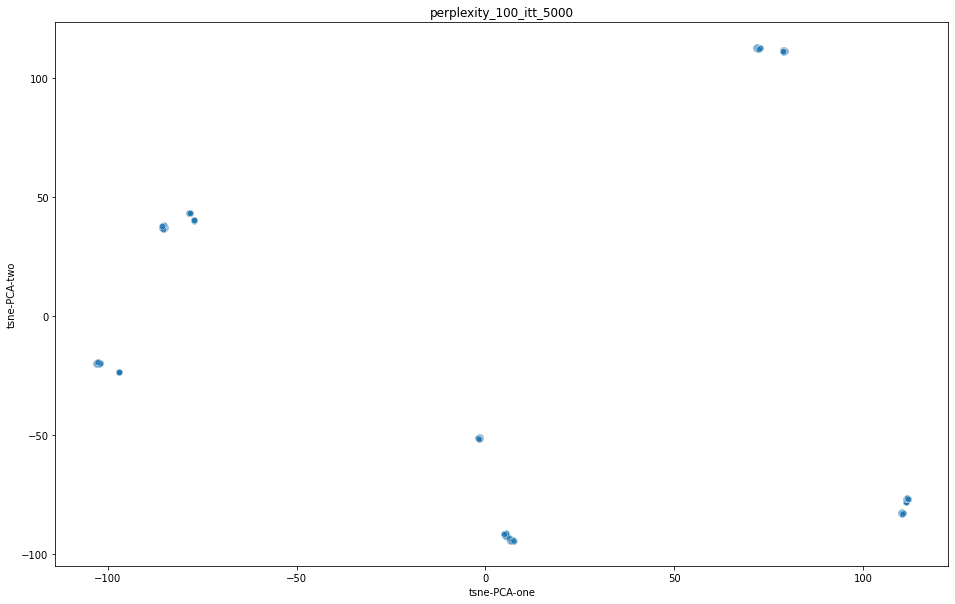

In [27]:
for i in [2,5,30,50,100]:
    tsne_pylins(X,i,5000) #being i the perplexity value and 5000 the recommended iterations

2. It is later recommended to reproduce the conditions through the Scikit-Learn manifold module (TSNE) and save the coordinates for further reproducibility of the visualization

C:\Users\leti_\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

C:\Users\leti_\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

C:\Users\leti_\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.453574
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.187347
[t-SNE] KL divergence after 5000 iterations: 0.130898


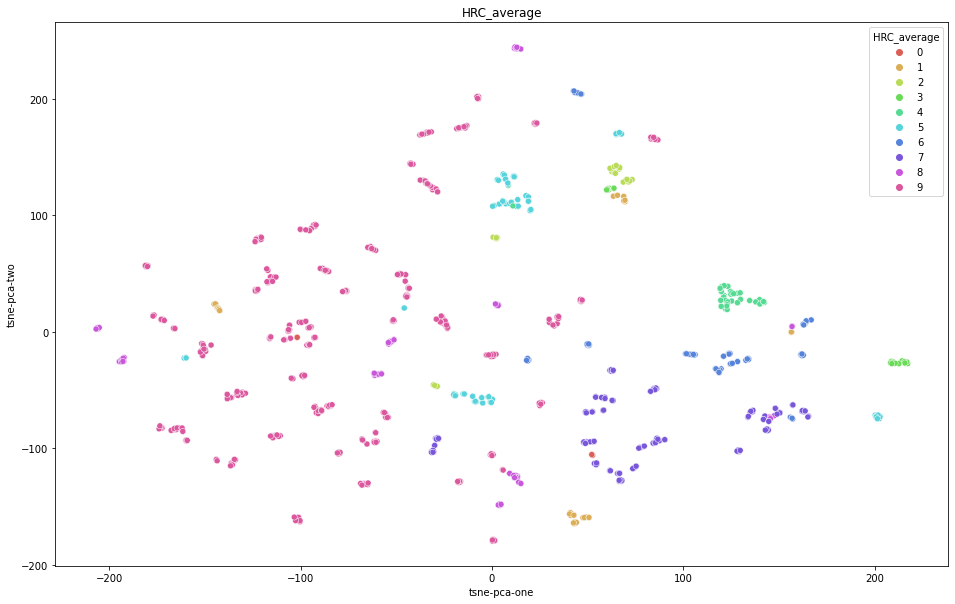

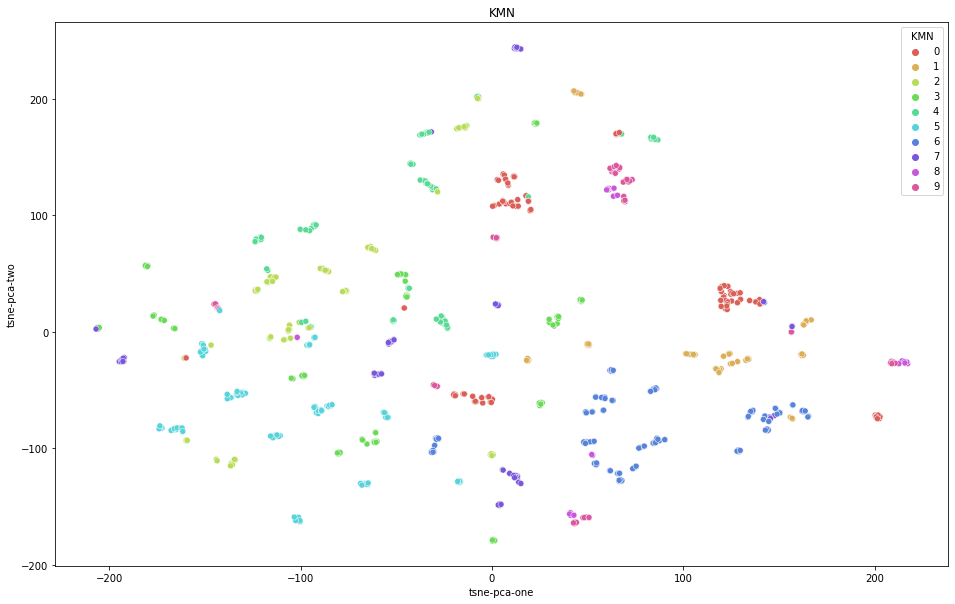

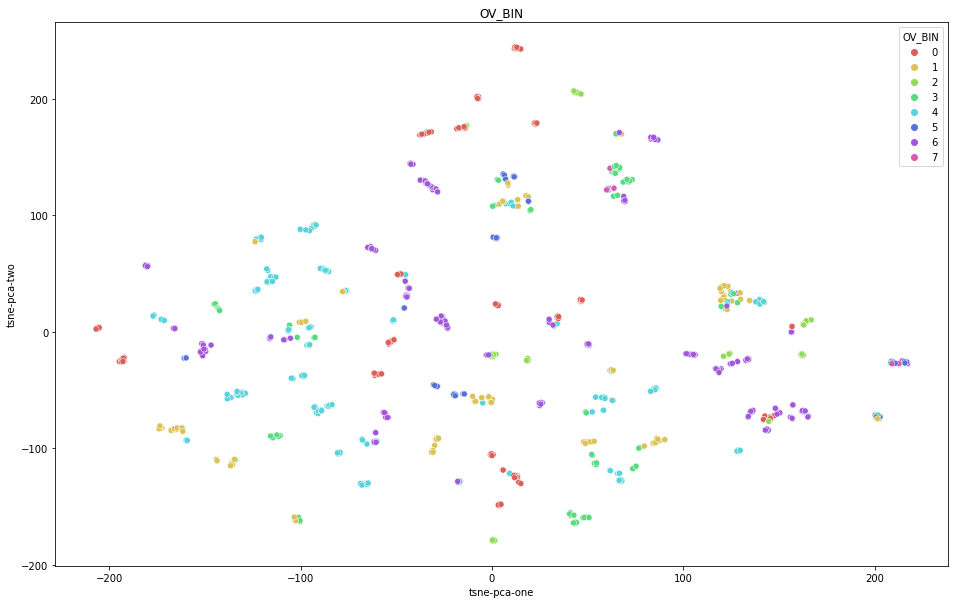

In [28]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=5000, init='pca')
tsne_results = tsne.fit_transform(X)
X_cluster2=X_cluster.copy()
X_cluster2['tsne-pca-one'] = tsne_results[:,0]
X_cluster2['tsne-pca-two'] = tsne_results[:,1]

# Preferably save X_cluster.to_csv('{}_tsne.csv'.format(CSVname))

Clusters_2dtsneplot(X, X_cluster2, clustering_names=['HRC_average', 'KMN', 'OV_BIN'])
